
Logistic Regression - Accuracy: 0.6189881324172393

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      3489
           1       0.60      0.48      0.54      2915

    accuracy                           0.62      6404
   macro avg       0.62      0.61      0.61      6404
weighted avg       0.62      0.62      0.61      6404



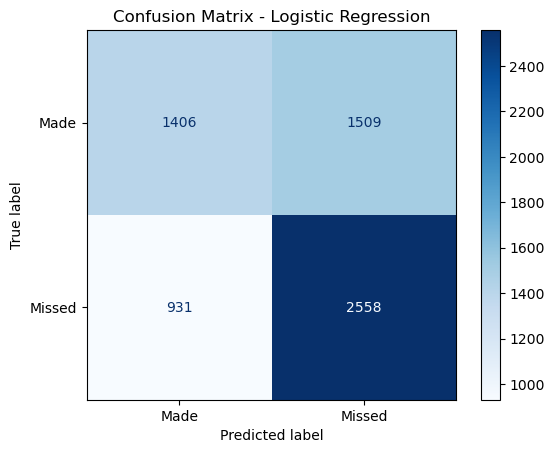

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

file_path = r"./data/shot_logs.csv"
df = pd.read_csv(file_path)

df['SHOT_CLOCK'] = df['SHOT_CLOCK'].fillna(df['SHOT_CLOCK'].median())

def convert_time_to_seconds(clock):
    if isinstance(clock, str):
        minutes, seconds = map(int, clock.split(":"))
        return minutes * 60 + seconds
    return None

df['GAME_CLOCK'] = df['GAME_CLOCK'].apply(convert_time_to_seconds)

df['LOCATION_NUM'] = df['LOCATION'].map({'H': 1, 'A': 0})
df['W_NUM'] = df['W'].map({'W': 1, 'L': 0})

encoder = LabelEncoder()
df['CLOSEST_DEFENDER_ENCODED'] = encoder.fit_transform(df['CLOSEST_DEFENDER'])

features = [
    'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'DRIBBLES', 'PTS_TYPE', 
    'FINAL_MARGIN', 'SHOT_NUMBER', 'GAME_CLOCK', 'PERIOD', 'LOCATION_NUM', 'W_NUM'
]
X = df[features]
y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

model = LogisticRegression(penalty='l2', C=0.1, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nLogistic Regression - Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Made", "Missed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
